In [1]:
import nltk
import pandas as pd
import csv
from pprint import pprint
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
nltk.download('punkt')



[nltk_data] Error loading punkt: <urlopen error [Errno 8] nodename nor
[nltk_data]     servname provided, or not known>


False

In [2]:
sentences=[]
df1=pd.read_csv('cleannord.csv',delimiter="\n")
df1.columns=['content']
df1
for i in range(15823):
    sentences.append(df1.content[i].split())
sentences[10]


['even',
 'source',
 'conflict',
 'present',
 'commercial',
 'conflicting',
 'interest',
 'wholly',
 'incompatible',
 'true',
 'extent',
 'gain',
 'party',
 'must',
 'become',
 'loss',
 'usually',
 'exis',
 'tbat',
 'party',
 'interest']

In [3]:
import gensim
dictionary = gensim.corpora.Dictionary(sentences)
print(dictionary)

Dictionary(28308 unique tokens: ['oomctirne', 'pond', 'shirt', 'circlement', 'occurence']...)


In [4]:
bow_corpus = [dictionary.doc2bow(doc) for doc in sentences]
from gensim import corpora, models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.42700466079027483), (1, 0.90424942336911796)]


In [5]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=2, id2word=dictionary)
for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.002*"press" + 0.002*"would" + 0.002*"peace" + 0.002*"york" + 0.001*"time" + 0.001*"norwegian" + 0.001*"swedish" + 0.001*"group" + 0.001*"norway" + 0.001*"social"
Topic: 1 Word: 0.003*"peace" + 0.002*"conflict" + 0.002*"norway" + 0.002*"norwegian" + 0.002*"aceh" + 0.002*"child" + 0.001*"government" + 0.001*"would" + 0.001*"people" + 0.001*"party"


# Doc2Vec

In [6]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [7]:
j=0
LabeledSentence1 = gensim.models.doc2vec.TaggedDocument
tagged_data=[]
for i in sentences:
    tagged_data.append(LabeledSentence1(i,[j]))
    j=j+1
    

In [8]:
len(tagged_data)

15823

In [9]:
d2v_model = Doc2Vec(tagged_data, size = 2000, window = 10, min_count = 500, workers=7, dm = 1, 
                alpha=0.025, min_alpha=0.001)

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/gensim/models/doc2vec.py:366: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [10]:
d2v_model.train(tagged_data, total_examples=d2v_model.corpus_count, epochs=10, start_alpha=0.002, end_alpha=-0.016)

In [57]:
print (d2v_model.docvecs.most_similar(7000))
print(tagged_data[13864],tagged_data[13412])
tagged_data[7000]

[(12147, 0.8655003309249878), (13725, 0.8647735118865967), (13864, 0.8645832538604736), (13909, 0.8645234704017639), (12697, 0.8643833994865417), (14640, 0.8640890121459961), (12742, 0.8640411496162415), (14565, 0.8639421463012695), (13295, 0.8635469675064087), (13412, 0.8635216355323792)]
TaggedDocument(['good', 'candidate', 'generalization', 'hold', 'across', 'tions', 'different', 'degree', 'example', 'verba', 'found', 'socioeconomic', 'status', 'related', 'electoral', 'participation', 'seven', 'country', 'studied', 'relationship', 'united', 'state', 'japan', 'virtually', 'irrelevant', 'austria', 'extent', 'political', 'party', 'stltulioos', 'compensated', 'individual', 'difference', 'resource', 'researcher', 'concluded', 'austria', 'differs', 'austrian', 'party', 'developed', 'different', 'pattern', 'political', 'mobilization', 'american', 'party'], [13864]) TaggedDocument(['relative', 'simply', 'mean', 'group', 'thus', 'identified', 'within', 'major', 'social', 'system', 'form', 'i

TaggedDocument(words=['nordic', 'model', 'relevance', 'united', 'state', 'many', 'sized', 'nordic', 'different', 'united', 'state', 'like', 'small', 'size', 'homogeneity', 'culture', 'listener', 'wondered', 'whether', 'american', 'could', 'mobilize', 'enough', 'power', 'make', 'change', 'significant', 'nordic', 'achieved'], tags=[7000])

# K-Means Clustering on Tagged Documents

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

kmeans_model = KMeans(n_clusters=2, init='k-means++', max_iter=100)  
X = kmeans_model.fit(d2v_model.docvecs.doctag_syn0)
labels=kmeans_model.labels_.tolist()
l = kmeans_model.fit_predict(d2v_model.docvecs.doctag_syn0)
pca = PCA(n_components=2).fit(d2v_model.docvecs.doctag_syn0)
datapoint = pca.transform(d2v_model.docvecs.doctag_syn0)

/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:6: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  if __name__ == '__main__':
/anaconda3/envs/tensorflow/lib/python3.5/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `doctag_syn0` (Attribute will be removed in 4.0.0, use docvecs.vectors_docs instead).
  # Remove the CWD from sys.path while we load stuff.


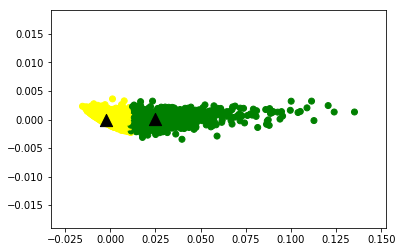

In [13]:
plt.figure
label1 = ["#FFFF00", "#008000"]
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)

centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:, 0], centroidpoint[:, 1], marker='^', s=150, c='#000000')
plt.show()

# It is clear that cluster 0 talks about Peaceful Sentences/Documents

In [17]:
for i in range(30):
    print(tagged_data[i])
    print(labels[i])

TaggedDocument(['resolving', 'conflict'], [0])
0
TaggedDocument(['case', 'small', 'industrialized', 'society'], [1])
0
TaggedDocument(['fvor'], [2])
0
TaggedDocument(['manifold', 'nclions', 'lorn', 'society', 'although', 'problem', 'conflict', 'resolution', 'merge', 'erate', 'legal', 'institu', 'tions', 'overlap', 'partial', 'modern', 'legal', 'tions', 'growth', 'legislation', 'ustrialized', 'society', 'suggests', 'used', 'instrument', 'furth', 'many', 'interest', 'ping', 'olution', 'infrequ', 'legis', 'lation', 'cial', 'confli', 'even', 'anticipated', 'legisb', 'accepted', 'necessary', 'effort', 'action', 'program', 'nevertheless', 'conflict', 'resolution', 'remained', 'important', 'concern', 'legal', 'tution', 'vvhntevor', 'legislation', 'instru', 'shaped', 'lopm', 'ping', 'ancl', 'resolut', 'always', 'foomed', 'large'], [3])
0
TaggedDocument(['purpose', 'paper', 'discus', 'trend', 'development', 'institutionalized', 'method', 'conflict', 'small', 'ized', 'orwa', 'basis', 'discussion

# Much more Peaceful than Non-Peaceful Documents found

In [15]:
zero=0
for i in labels:
    if i==0:
        zero=zero+1
ones=len(labels)-zero
print(zero,ones)

14549 1274
